Find the frequency of words in Mr. Kenneth Lay’s emails in the deleted_item folder

In [1]:
#importing required packages
import os
from email.parser import Parser
import nltk
from nltk.corpus import stopwords

In [2]:
#initializations
email_body=[]

In [3]:
#Get current working directory
cwd = os.getcwd()
#Check for 'Input Data' folder and find 'sent_mail' folder under 'mann-k'
parent_directory="Input Data"
if os.path.exists(cwd+"/"+parent_directory):
    path=cwd+"/"+parent_directory
    if os.path.exists(path+'/enron_mail_20150507/maildir/lay-k/deleted_items'):
        path=path+'/enron_mail_20150507/maildir/lay-k/deleted_items'
        #traversing through various directories, subdirectories and files
        for directory, subdirectory, filenames in  os.walk(path):
            for filename in filenames:
                with open(os.path.join(directory, filename), "r") as f:
                    data = f.read()
                email = Parser().parsestr(data)
                email_body.append(email.get_payload())
        print('File imported')
    else:
        print("File does not exist")
else:
    print('Path does not exist.')

File imported


In [4]:
#extract words using split
parts=[]
for element in email_body:
    for email in element.rstrip().split(' '):
        parts.append(email)

In [5]:
#create a dictionary containing words and its frequency
wordcount={}
for word in parts:
    if word.isalpha():
        if word not in stopwords.words():
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
sorted_words=sorted(wordcount.items(), key=lambda x: x[1], reverse=True)
print("Top 15 words and their frequencies are: ")
sorted_words[:15]

Top 15 words and their frequencies are: 


[('Enron', 5552),
 ('energy', 3322),
 ('consumers', 3206),
 ('made', 3142),
 ('employees', 2242),
 ('donate', 2236),
 ('stock', 2233),
 ('retirement', 2219),
 ('bankruptcy', 2205),
 ('California', 2186),
 ('millions', 2148),
 ('pay', 2132),
 ('declared', 2099),
 ('company', 2042),
 ('funds', 1127)]

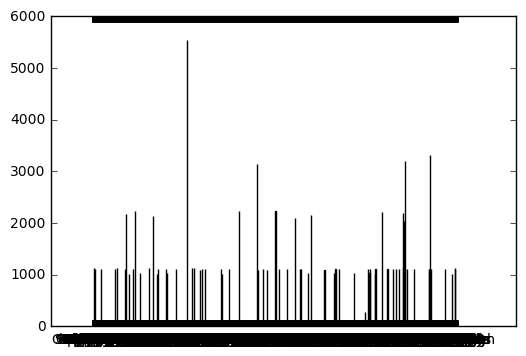

In [6]:
#generate a bar graph using the above generated frequency dictionary
import matplotlib.pyplot as plt

plt.bar(range(len(wordcount)), wordcount.values(), align='center')
plt.xticks(range(len(wordcount)), wordcount.keys())
plt.gca().invert_xaxis()

plt.show()

In [ ]:
#The word 'bankruptcy' stands out among the list of top words.
#Hence we find the number of emails in this deleted folder that contain 'bankruptcy'
#We traverse using the same technique and save append the filenames containing the 'bankruptcy' to a 'filename_list' list.

In [8]:
#initializations
email_body=[]
filename_list=[]
#Get current working directory
cwd = os.getcwd()
#Check for 'Input Data' folder and find 'sent_mail' folder under 'mann-k'
parent_directory="Input Data"
if os.path.exists(cwd+"/"+parent_directory):
    path=cwd+"/"+parent_directory
    if os.path.exists(path+'/enron_mail_20150507/maildir/lay-k/deleted_items'):
        path=path+'/enron_mail_20150507/maildir/lay-k/deleted_items'
        #traversing through various directories, subdirectories and files and finding the word 'bankruptcy' in each file.
        for directory, subdirectory, filenames in  os.walk(path):
            for filename in filenames:
                with open(os.path.join(directory, filename), "r") as f:
                    data = f.read()
                email_body=[]
                email = Parser().parsestr(data)
                email_body.append(email.get_payload())
                for element in email_body:
                    for word in element.rstrip().split(' '):
                        if word == 'bankruptcy':
                            filename_list.append(directory+"\\"+filename)
        print('File imported')
    else:
        print("File does not exist")
else:
    print('Path does not exist.')

File imported


In [9]:
#Find the frequency of the word in each file.
filecount={}
for file in filename_list:
    if file not in filecount:
        filecount[file] = 1
    else:
        filecount[file] += 1
sorted_files=sorted(filecount.items(), key=lambda x: x[1], reverse=True)

In [10]:
#count of total number of files
len(filenames)

1126

In [11]:
#count of files which have 'bankruptcy' used twice
len(sorted_files)

1121

In [ ]:
#On checking the output we understand that every file has the word 'bankruptcy' occuring 2 times.
#On closer inspection we understand that body of these emails are same with the only change in salutations.
#Hence we can conclude that there might have been a survey or a poll conducted after the Enron scandle was publisized 
#and the people who signed up for this survey have sent the same mail to My Kenneth Lay